In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import glob

In [3]:
glob.glob(r"C:\Users\John\Downloads\S&P_resources\individual_stocks_5yr\*csv")

['C:\\Users\\John\\Downloads\\S&P_resources\\individual_stocks_5yr\\AAL_data.csv',
 'C:\\Users\\John\\Downloads\\S&P_resources\\individual_stocks_5yr\\AAPL_data.csv',
 'C:\\Users\\John\\Downloads\\S&P_resources\\individual_stocks_5yr\\AAP_data.csv',
 'C:\\Users\\John\\Downloads\\S&P_resources\\individual_stocks_5yr\\ABBV_data.csv',
 'C:\\Users\\John\\Downloads\\S&P_resources\\individual_stocks_5yr\\ABC_data.csv',
 'C:\\Users\\John\\Downloads\\S&P_resources\\individual_stocks_5yr\\ABT_data.csv',
 'C:\\Users\\John\\Downloads\\S&P_resources\\individual_stocks_5yr\\ACN_data.csv',
 'C:\\Users\\John\\Downloads\\S&P_resources\\individual_stocks_5yr\\ADBE_data.csv',
 'C:\\Users\\John\\Downloads\\S&P_resources\\individual_stocks_5yr\\ADI_data.csv',
 'C:\\Users\\John\\Downloads\\S&P_resources\\individual_stocks_5yr\\ADM_data.csv',
 'C:\\Users\\John\\Downloads\\S&P_resources\\individual_stocks_5yr\\ADP_data.csv',
 'C:\\Users\\John\\Downloads\\S&P_resources\\individual_stocks_5yr\\ADSK_data.csv',


In [4]:
len(glob.glob(r"C:\Users\John\Downloads\S&P_resources\individual_stocks_5yr\*csv"))

505

In [5]:
company_list = [
    'C:\\Users\\John\\Downloads\\S&P_resources\\individual_stocks_5yr\\AAPL_data.csv',
    'C:\\Users\\John\\Downloads\\S&P_resources\\individual_stocks_5yr\\AMZN_data.csv',
    'C:\\Users\\John\\Downloads\\S&P_resources\\individual_stocks_5yr\\GOOGL_data.csv',
    'C:\\Users\\John\\Downloads\\S&P_resources\\individual_stocks_5yr\\MSFT_data.csv',
]

In [6]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [7]:
all_data = pd.DataFrame()

for file in company_list:
    current_df = pd.read_csv(file)
    
    all_data=current_df.append(all_data,ignore_index = True)
    ##full_df = pd.concat([full_df, current_df)], ignore_index= True

In [8]:
all_data.shape

(5036, 7)

In [9]:
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [10]:
tech_list = all_data['Name'].unique() # to get unique list 

In [11]:
print(tech_list)
len(tech_list)

['MSFT' 'GOOGL' 'AMZN' 'AAPL']


4

# Analysing change in the price of stock overtime
    

In [12]:
all_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [13]:
all_data.describe().T # measuring statiscal values like mean, standard deviation, percentiles

,count,mean,std,min,25%,50%,75%,max
open,5036.0,3.548265e+02,3.260948e+02,27.35,7.053750e+01,2.141550e+02,5.860127e+02,1.477390e+03
high,5036.0,3.576918e+02,3.285449e+02,27.60,7.105888e+01,2.165150e+02,5.895097e+02,1.498000e+03
low,5036.0,3.516443e+02,3.232933e+02,27.23,6.986975e+01,2.120000e+02,5.797024e+02,1.450040e+03
close,5036.0,3.548109e+02,3.260791e+02,27.37,7.038120e+01,2.137450e+02,5.846950e+02,1.450890e+03
volume,5036.0,2.352633e+07,2.908998e+07,521141.00,2.642110e+06,1.264079e+07,3.472027e+07,2.668336e+08


In [14]:
all_data.info() # checking info of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5036 entries, 0 to 5035
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    5036 non-null   object 
 1   open    5036 non-null   float64
 2   high    5036 non-null   float64
 3   low     5036 non-null   float64
 4   close   5036 non-null   float64
 5   volume  5036 non-null   int64  
 6   Name    5036 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 275.5+ KB


In [15]:
all_data.shape # checking shape of data

(5036, 7)

In [16]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [17]:
# since date is object, that is string , it needs to be converted into proper form for accurate analysis

In [18]:
all_data["date"] = pd.to_datetime(all_data['date'])

In [19]:
all_data['date']

0      2013-02-08
1      2013-02-11
2      2013-02-12
3      2013-02-13
4      2013-02-14
          ...    
5031   2018-02-01
5032   2018-02-02
5033   2018-02-05
5034   2018-02-06
5035   2018-02-07
Name: date, Length: 5036, dtype: datetime64[ns]

In [20]:
all_data['date'].dtypes

dtype('<M8[ns]')

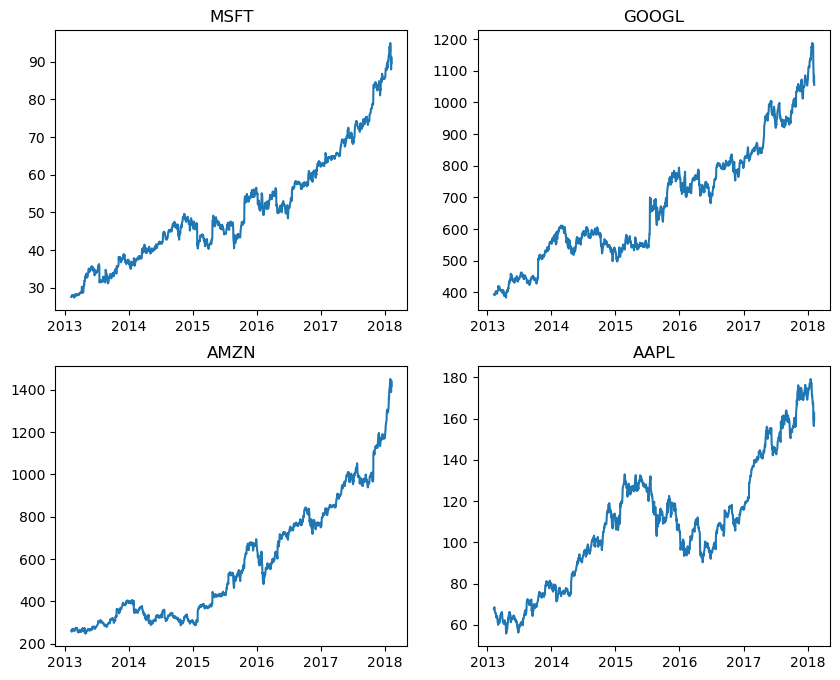

In [21]:
plt.figure(figsize=(10,8))

for index, company in enumerate(tech_list, 1):
    plt.subplot(2,2,index) # subplot for each of stock in tech_list 
    filter1 = all_data['Name']==company
    df = all_data[filter1]
    plt.plot(df['date'],df['close']) # plotting date vs close
    plt.title(company)

# moving average of the various stocks

In [22]:
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [23]:
all_data['close'].rolling(window=10).mean().head(20)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9     27.8535
10    27.8355
11    27.7865
12    27.7795
13    27.7565
14    27.7475
15    27.7615
16    27.7920
17    27.8140
18    27.8790
19    27.9030
Name: close, dtype: float64

In [24]:
new_data = all_data.copy()

In [25]:
#dir(pd)

In [26]:
ma_day = [10, 20, 50]

for ma in ma_day:
    new_data['close_'+str(ma)] = new_data['close'].rolling(ma).mean()
    

In [27]:
new_data.tail(20)

,date,open,high,low,close,volume,Name,close_10,close_20,close_50
5016,2018-01-10,173.160,174.3000,173.0000,174.29,23959895,AAPL,172.640,173.1230,172.1922
5017,2018-01-11,174.590,175.4886,174.4900,175.28,18667729,AAPL,173.108,173.3020,172.3634
5018,2018-01-12,176.180,177.3600,175.6500,177.09,25418080,AAPL,173.709,173.5430,172.5244
5019,2018-01-16,177.900,179.3900,176.1400,176.19,29565947,AAPL,174.405,173.7415,172.7104
5020,2018-01-17,176.150,179.2500,175.0700,179.10,34386836,AAPL,175.089,173.9980,172.9302
5021,2018-01-18,179.370,180.1000,178.2500,179.26,31193352,AAPL,175.792,174.1400,173.0654
5022,2018-01-19,178.610,179.5800,177.4100,178.46,32425067,AAPL,176.335,174.3360,173.1496
5023,2018-01-22,177.300,177.7800,176.6016,177.00,27108551,AAPL,176.535,174.4685,173.1934
5024,2018-01-23,177.300,179.4400,176.8200,177.04,32689146,AAPL,176.804,174.5700,173.2094
5025,2018-01-24,177.250,177.3000,173.2000,174.22,51105090,AAPL,176.793,174.5305,173.1762


In [28]:
# ideally closing of 200 days gives good result, here on the above, close_10 results in higher
# fluctuations whereas in close_50 veraition is less

In [29]:
# to use pandas plot, the df needs o have date as the index.


In [30]:
new_data.set_index('date',inplace =True)

In [31]:
new_data

,open,high,low,close,volume,Name,close_10,close_20,close_50
date,,,,,,,,,
2013-02-08,27.350,27.71,27.3100,27.55,33318306,MSFT,NaN,NaN,NaN
2013-02-11,27.650,27.92,27.5000,27.86,32247549,MSFT,NaN,NaN,NaN
2013-02-12,27.880,28.00,27.7500,27.88,35990829,MSFT,NaN,NaN,NaN
2013-02-13,27.930,28.11,27.8800,28.03,41715530,MSFT,NaN,NaN,NaN
2013-02-14,27.920,28.06,27.8700,28.04,32663174,MSFT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2018-02-01,167.165,168.62,166.7600,167.78,47230787,AAPL,171.948,173.8700,172.8252
2018-02-02,166.000,166.80,160.1000,160.50,86593825,AAPL,170.152,173.2435,172.6356
2018-02-05,159.100,163.88,156.0000,156.49,72738522,AAPL,168.101,172.3180,172.3026


In [32]:
new_data.keys()

Index(['open', 'high', 'low', 'close', 'volume', 'Name', 'close_10',
       'close_20', 'close_50'],
      dtype='object')

In [33]:
new_data.columns

Index(['open', 'high', 'low', 'close', 'volume', 'Name', 'close_10',
       'close_20', 'close_50'],
      dtype='object')

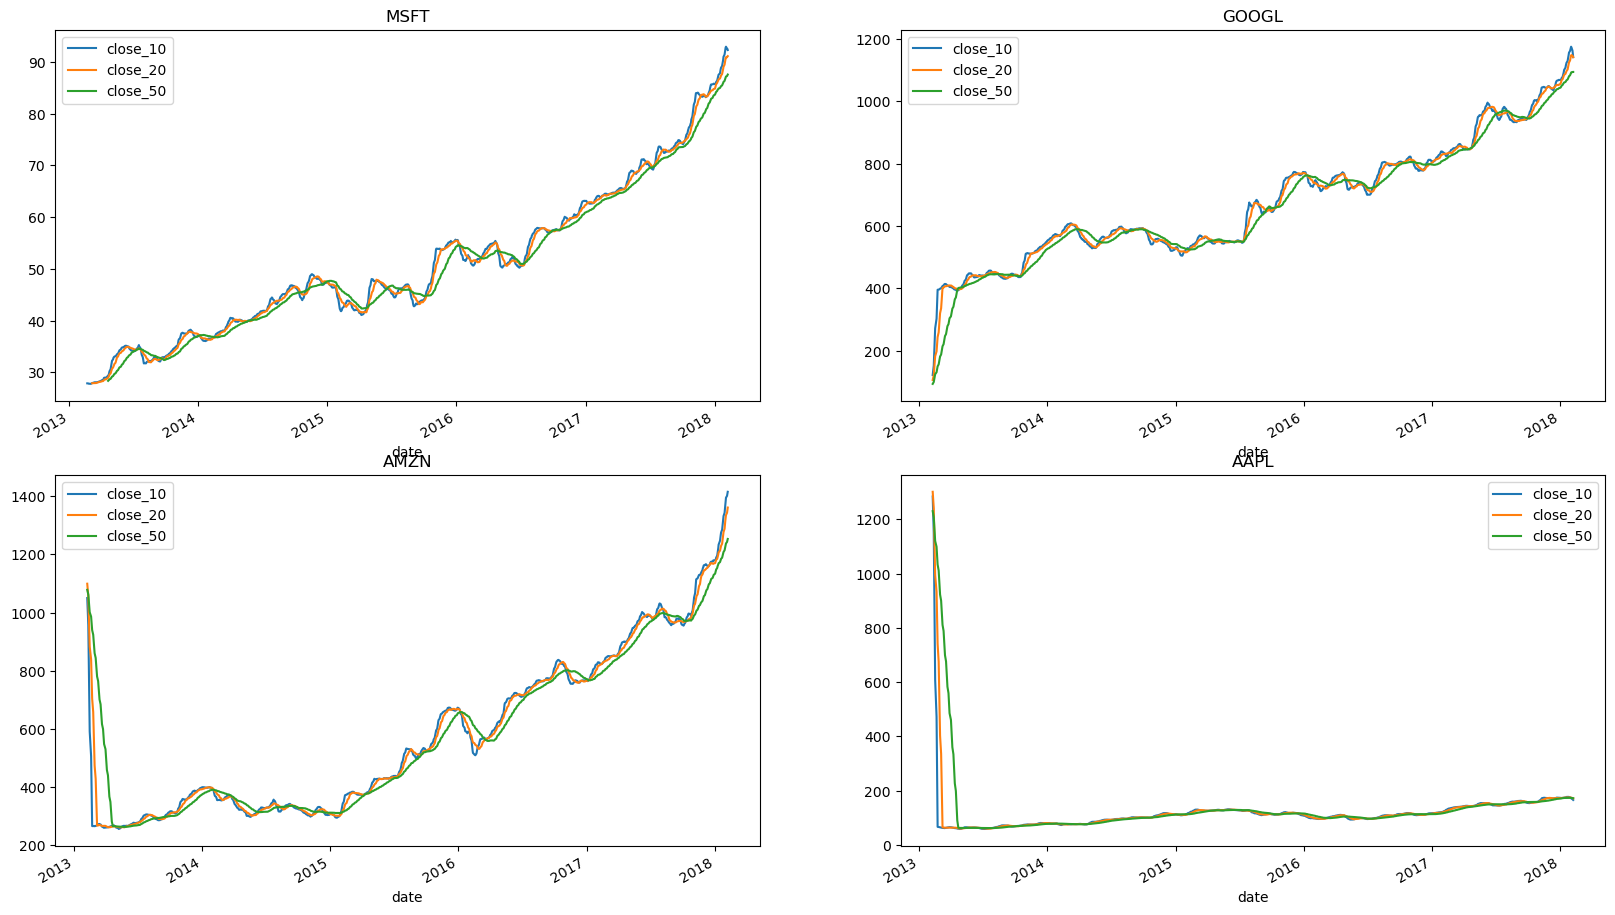

In [34]:
plt.figure(figsize=(20,12))

for index, company in enumerate(tech_list, 1):
    plt.subplot(2, 2, index)
    filter1=new_data['Name']==company
    df = new_data[filter1]
    df[['close_10', 'close_20', 'close_50']].plot(ax=plt.gca())
    plt.title(company)

# Analysing closing price change in apple stock

#### Daily Stock Return Formula
To calculate how much you gained or lost per day for a stock, subtract the opening price from 
the closing price. Then, multiply the result by the number of shares you own in
the company.

In [35]:
company_list

['C:\\Users\\John\\Downloads\\S&P_resources\\individual_stocks_5yr\\AAPL_data.csv',
 'C:\\Users\\John\\Downloads\\S&P_resources\\individual_stocks_5yr\\AMZN_data.csv',
 'C:\\Users\\John\\Downloads\\S&P_resources\\individual_stocks_5yr\\GOOGL_data.csv',
 'C:\\Users\\John\\Downloads\\S&P_resources\\individual_stocks_5yr\\MSFT_data.csv']

In [36]:
apple = pd.read_csv('C:\\Users\\John\\Downloads\\S&P_resources\\individual_stocks_5yr\\AAPL_data.csv')

In [37]:
apple.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [38]:
apple.close

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: close, Length: 1259, dtype: float64

In [39]:
apple['close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: close, Length: 1259, dtype: float64

In [40]:
len(apple)

1259

In [41]:
apple['Daily return(in%)'] = apple['close'].pct_change()*100

# pct_change() returns, the %age change between the current and prior element

In [42]:
apple.head()

,date,open,high,low,close,volume,Name,Daily return(in%)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


In [89]:
#apple.drop('Daily retunr(in%)',axis=1)

In [ ]:
import plotly.express as px

In [ ]:
px.line(apple, x = 'date', y = 'Daily return(in%)')

#  Performing resampling analysis of closing price

#### Before doing resampling,first u have to make your date feature 'row-index' so that u can resample data on various basis :

a..yearly('Y')  , 

b..quarterly('Q')   ,

c..monthly('M') ,

d..weekly basis ('W'), 

e..Daily_basis('D')  

f..minutes ('3T') , 

g..30 second bins('30S')   ,

h..resample('17min')

In [44]:
apple.dtypes

date                  object
open                 float64
high                 float64
low                  float64
close                float64
volume                 int64
Name                  object
Daily return(in%)    float64
dtype: object

In [45]:
apple['date']= pd.to_datetime(apple['date'])

In [46]:
apple.dtypes

date                 datetime64[ns]
open                        float64
high                        float64
low                         float64
close                       float64
volume                        int64
Name                         object
Daily return(in%)           float64
dtype: object

In [47]:
apple.head()

,date,open,high,low,close,volume,Name,Daily return(in%)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


In [48]:
#to plot in pandas line plot, date must be the index

In [49]:
apple.set_index('date', inplace=True)

In [50]:
apple.head()

,open,high,low,close,volume,Name,Daily return(in%)
date,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


In [51]:
apple['close'].resample('M').mean()

date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: M, Name: close, Length: 61, dtype: float64

<Axes: xlabel='date'>

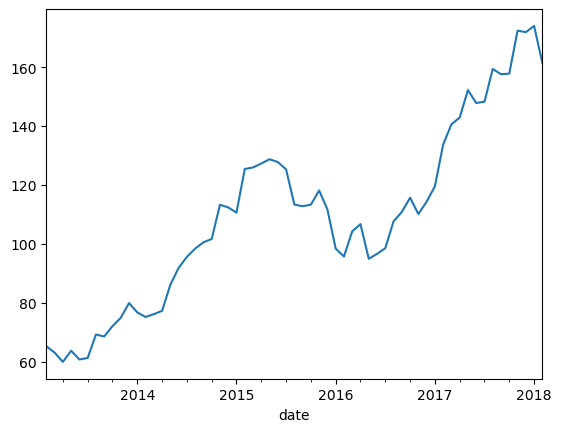

In [52]:
apple['close'].resample('M').mean().plot()

In [53]:
apple['close'].resample('Y').mean()

date
2013-12-31     67.237839
2014-12-31     92.264531
2015-12-31    120.039861
2016-12-31    104.604008
2017-12-31    150.585080
2018-12-31    171.594231
Freq: A-DEC, Name: close, dtype: float64

<Axes: xlabel='date'>

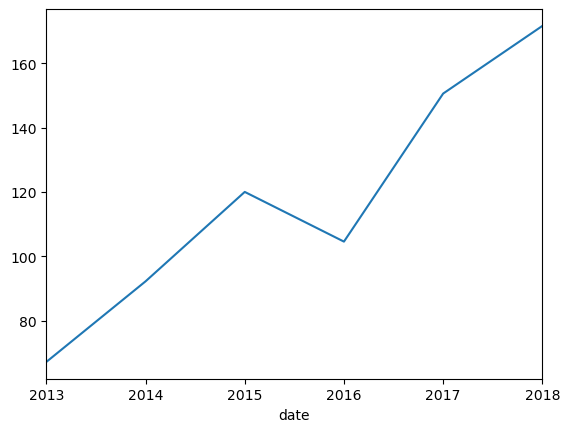

In [55]:
apple['close'].resample('Y').mean().plot()

# Whether closing prices of these tech companies (Amazon,Apple,Google,Microsoft) are correlated or not 

In [56]:
company_list

['C:\\Users\\John\\Downloads\\S&P_resources\\individual_stocks_5yr\\AAPL_data.csv',
 'C:\\Users\\John\\Downloads\\S&P_resources\\individual_stocks_5yr\\AMZN_data.csv',
 'C:\\Users\\John\\Downloads\\S&P_resources\\individual_stocks_5yr\\GOOGL_data.csv',
 'C:\\Users\\John\\Downloads\\S&P_resources\\individual_stocks_5yr\\MSFT_data.csv']

In [57]:
company_list[0]

'C:\\Users\\John\\Downloads\\S&P_resources\\individual_stocks_5yr\\AAPL_data.csv'

In [58]:
apple= pd.read_csv(company_list[0])
amzn= pd.read_csv(company_list[1])
google= pd.read_csv(company_list[2])
msft= pd.read_csv(company_list[3])

In [59]:
closing_price = pd.DataFrame()

In [60]:
closing_price['apple_close'] = apple['close']
closing_price['amzn_close'] = amzn['close']
closing_price['google_close'] = google['close']
closing_price['msft_close'] = msft['close']

In [61]:
closing_price

,apple_close,amzn_close,google_close,msft_close
0,67.8542,261.95,393.0777,27.55
1,68.5614,257.21,391.6012,27.86
2,66.8428,258.70,390.7403,27.88
3,66.7156,269.47,391.8214,28.03
4,66.6556,269.24,394.3039,28.04
...,...,...,...,...
1254,167.7800,1390.00,1181.5900,94.26
1255,160.5000,1429.95,1119.2000,91.78
1256,156.4900,1390.00,1062.3900,88.00
1257,163.0300,1442.84,1084.4300,91.33


In [62]:
'''
    Pair-plot is all about , we can considering some pairs & 
    we are trying to plot scatterplot of it..
    
    Unique plots : 4c2 = 6 unique plots
    
    Total plots : 15 ( 6 unique + 6 mirror images of these 
    unique one + 3 diagonal plots(histogram))

'''


# Dis-advantages: 
## Can't be used when number of features are high.
## Cannot visualize higher dimensional patterns in 3-D and 4-D. 
## Only possible to view 2D patterns.



# NOTE: the diagnol elements are (histogram) for each feature.

'\n    Pair-plot is all about , we can considering some pairs & \n    we are trying to plot scatterplot of it..\n    \n    Unique plots : 4c2 = 6 unique plots\n    \n    Total plots : 15 ( 6 unique + 6 mirror images of these \n    unique one + 3 diagonal plots(histogram))\n\n'

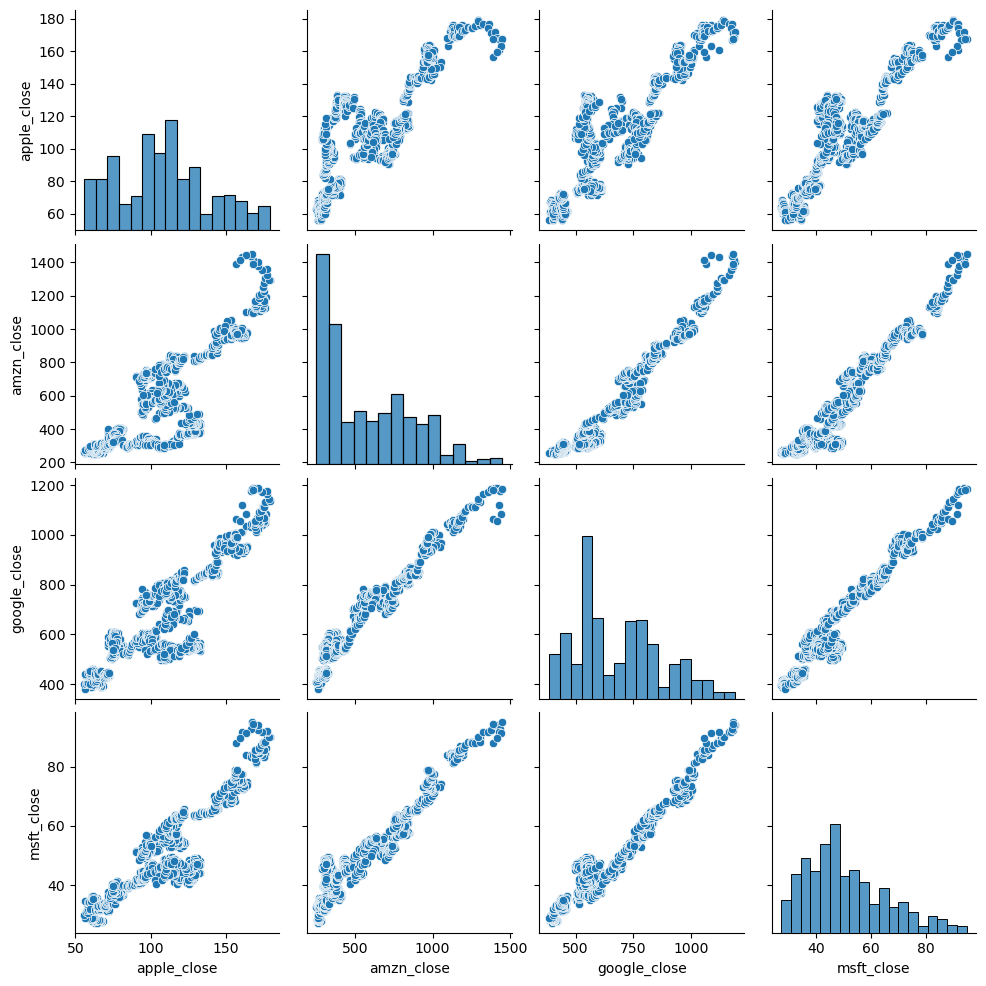

In [63]:
sns.pairplot(closing_price)

In [64]:
closing_price.corr()

,apple_close,amzn_close,google_close,msft_close
apple_close,1.000000,0.819078,0.843736,0.899689
amzn_close,0.819078,1.000000,0.973988,0.955977
google_close,0.843736,0.973988,1.000000,0.970779
msft_close,0.899689,0.955977,0.970779,1.000000


<Axes: >

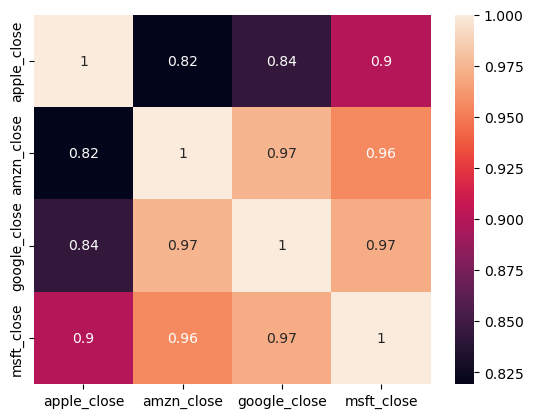

In [65]:
sns.heatmap(closing_price.corr(), annot=True)

In [ ]:
'''
Conclusion:
Closing price of Google and Microsoft are well correlated
& Closing price of Amazon and Microsoft have a co-relation of 0.96


'''

# Analysing Whether Daily change in Closing price of stocks or Daily Returns in Stock are co-related or not !

In [66]:
closing_price

,apple_close,amzn_close,google_close,msft_close
0,67.8542,261.95,393.0777,27.55
1,68.5614,257.21,391.6012,27.86
2,66.8428,258.70,390.7403,27.88
3,66.7156,269.47,391.8214,28.03
4,66.6556,269.24,394.3039,28.04
...,...,...,...,...
1254,167.7800,1390.00,1181.5900,94.26
1255,160.5000,1429.95,1119.2000,91.78
1256,156.4900,1390.00,1062.3900,88.00
1257,163.0300,1442.84,1084.4300,91.33


In [67]:
closing_price['apple_close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: apple_close, Length: 1259, dtype: float64

In [69]:
closing_price['apple_close'].shift(1)

0            NaN
1        67.8542
2        68.5614
3        66.8428
4        66.7156
          ...   
1254    167.4300
1255    167.7800
1256    160.5000
1257    156.4900
1258    163.0300
Name: apple_close, Length: 1259, dtype: float64

In [68]:
(closing_price['apple_close'] - closing_price['apple_close'].shift(1))/closing_price['apple_close'].shift(1) *100

0            NaN
1       1.042235
2      -2.506658
3      -0.190297
4      -0.089934
          ...   
1254    0.209043
1255   -4.339015
1256   -2.498442
1257    4.179181
1258   -2.140710
Name: apple_close, Length: 1259, dtype: float64

In [70]:
closing_price.head()

,apple_close,amzn_close,google_close,msft_close
0,67.8542,261.95,393.0777,27.55
1,68.5614,257.21,391.6012,27.86
2,66.8428,258.70,390.7403,27.88
3,66.7156,269.47,391.8214,28.03
4,66.6556,269.24,394.3039,28.04


In [71]:
for col in closing_price:
    closing_price[col + '_pct_change']= (closing_price[col] - closing_price[col].shift(1))/closing_price[col].shift(1) *100
    

In [72]:
closing_price

,apple_close,amzn_close,google_close,msft_close,apple_close_pct_change,amzn_close_pct_change,google_close_pct_change,msft_close_pct_change
0,67.8542,261.95,393.0777,27.55,NaN,NaN,NaN,NaN
1,68.5614,257.21,391.6012,27.86,1.042235,-1.809506,-0.375625,1.125227
2,66.8428,258.70,390.7403,27.88,-2.506658,0.579293,-0.219841,0.071788
3,66.7156,269.47,391.8214,28.03,-0.190297,4.163123,0.276680,0.538020
4,66.6556,269.24,394.3039,28.04,-0.089934,-0.085353,0.633579,0.035676
...,...,...,...,...,...,...,...,...
1254,167.7800,1390.00,1181.5900,94.26,0.209043,-4.196734,-0.053290,-0.789391
1255,160.5000,1429.95,1119.2000,91.78,-4.339015,2.874101,-5.280173,-2.631021
1256,156.4900,1390.00,1062.3900,88.00,-2.498442,-2.793804,-5.075947,-4.118544
1257,163.0300,1442.84,1084.4300,91.33,4.179181,3.801439,2.074568,3.784091


In [77]:
closing_price.columns

Index(['apple_close', 'amzn_close', 'google_close', 'msft_close',
       'apple_close_pct_change', 'amzn_close_pct_change',
       'google_close_pct_change', 'msft_close_pct_change'],
      dtype='object')

In [82]:
closing_pct = closing_price[['apple_close_pct_change', 'amzn_close_pct_change','google_close_pct_change', 'msft_close_pct_change']]

In [83]:
closing_pct

,apple_close_pct_change,amzn_close_pct_change,google_close_pct_change,msft_close_pct_change
0,NaN,NaN,NaN,NaN
1,1.042235,-1.809506,-0.375625,1.125227
2,-2.506658,0.579293,-0.219841,0.071788
3,-0.190297,4.163123,0.276680,0.538020
4,-0.089934,-0.085353,0.633579,0.035676
...,...,...,...,...
1254,0.209043,-4.196734,-0.053290,-0.789391
1255,-4.339015,2.874101,-5.280173,-2.631021
1256,-2.498442,-2.793804,-5.075947,-4.118544
1257,4.179181,3.801439,2.074568,3.784091


In [ ]:
'''
Pairplot : we have histogram on diagonals & scatterplot/kde/
            any_other_plot which tells relationship with on rest of the plot 


Pairgrid : Once we create grid , we can set plot as per our need : 

ie , if we have 4 features , it creates total 16 graphs/plots or matrices of 4*4



    There would be various possibilities for type of plots in our Pairgrid which we can set as per our need :

    a) all plots can be scatterplot
    b) on diagonal , we have histogram & rest will be scatterplot
    c) on diagonal , we have histogram & rest will be kdeplot 
    c) on diagonal , we have histogram & below diagonal will be kdeplot
            & upper diagonal will be scatterplot 

Note :: kdeplot for 2 features also known as contour plots which returns density
but kdeplot returns distribution if we are performing univariate analysis else it will show density ..


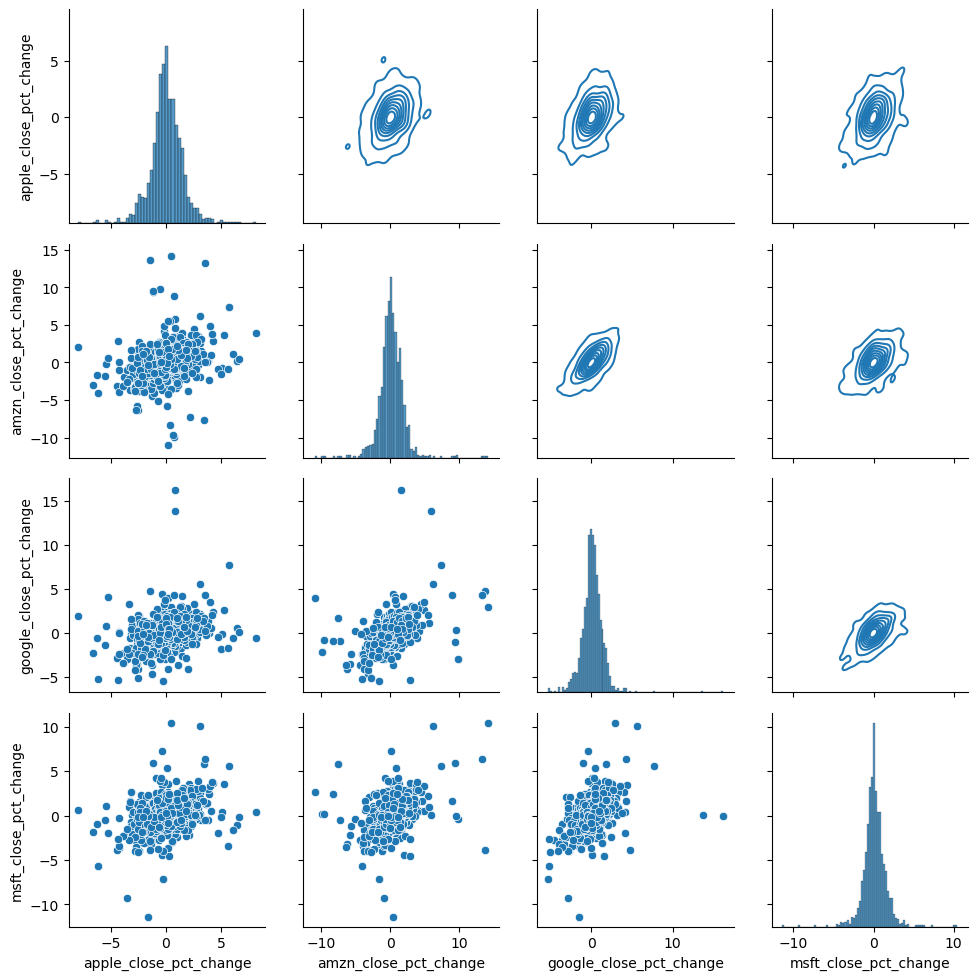

In [86]:
g = sns.PairGrid(data= closing_pct)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

In [ ]:
'''

Conclusion :
While Comparing 'AAPL_close_pct_change' to 'AMZN_close_pct_change'  , it shows a linear relationship upto some extent..


'''

In [87]:
closing_pct.corr()

,apple_close_pct_change,amzn_close_pct_change,google_close_pct_change,msft_close_pct_change
apple_close_pct_change,1.000000,0.287659,0.348858,0.366598
amzn_close_pct_change,0.287659,1.000000,0.548423,0.402678
google_close_pct_change,0.348858,0.548423,1.000000,0.488373
msft_close_pct_change,0.366598,0.402678,0.488373,1.000000
